In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.filterwarnings('ignore')
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
books = pd.read_csv("books.csv", error_bad_lines = False)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [3]:
books.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [4]:
books.isnull().sum()
#has no missing data

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [5]:
books.shape

(11123, 12)

In [6]:
books.duplicated().sum()

0

In [7]:
books.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


### Rating counts and text_review_count have very high max value. 
### Minimum value for number pages is 0. 
### Sincea book cant have 0 pages it can be an error. 
### Maximum num_page is also very high, its unlikely to have a book with 6576 pages. It could be outlier

In [8]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


<AxesSubplot:title={'center':'Number of book written by author'}, xlabel='authors', ylabel='count'>

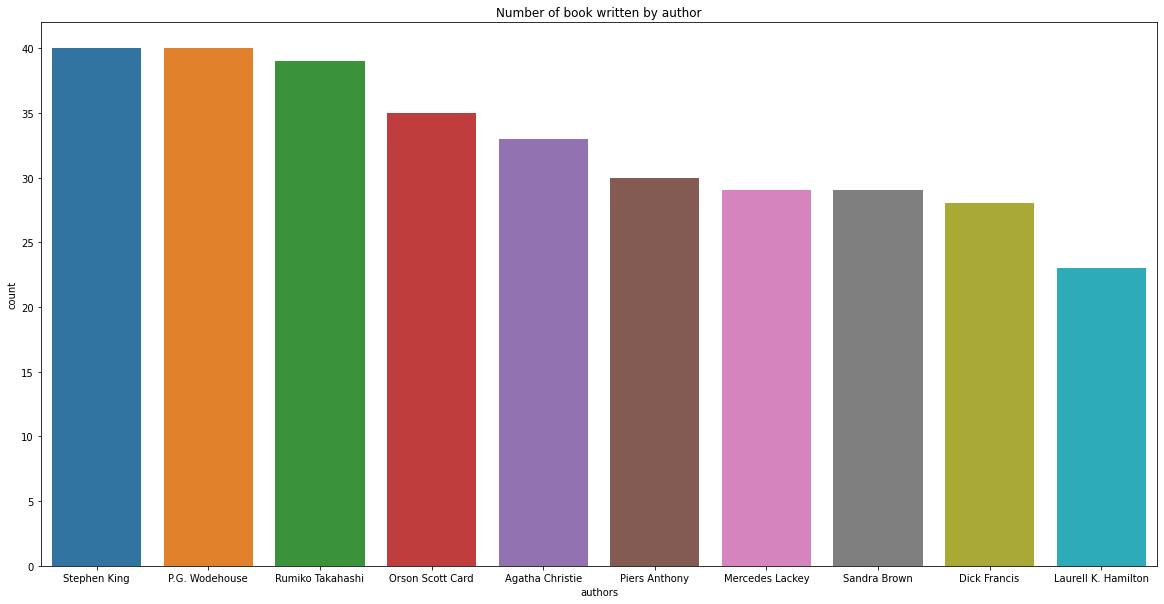

In [9]:
#ploting top10 author by number of books written
plt.figure(1, figsize = (20,10))
plt.title("Number of book written by author")
sns.countplot(x="authors", order=books["authors"].value_counts().index[0:10],data= books)


In [10]:
books[books["authors"] == "Stephen King"].value_counts().sum()

40

In [11]:
books[books["authors"] == "P.G. Wodehouse"].value_counts().sum()
#Stephen king and P.G. wodehouse has same amount of books written

40

<AxesSubplot:title={'center':'Most occuring language'}, xlabel='language_code', ylabel='count'>

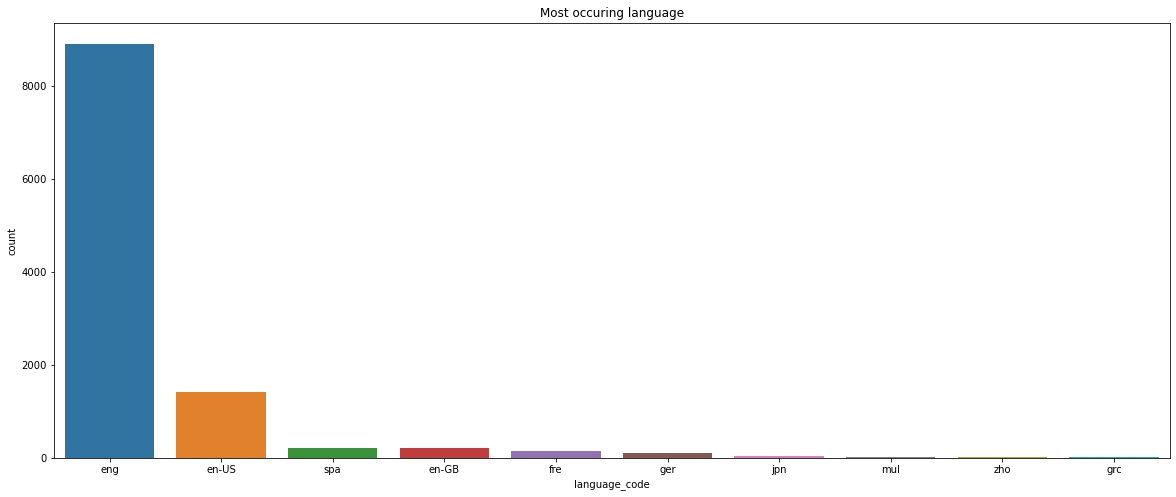

In [12]:
#plotting most occuring language
plt.figure(1, figsize = (20,8))
plt.title("Most occuring language")
sns.countplot(x="language_code", order = books["language_code"].value_counts().index[0:10],data=books)

<AxesSubplot:xlabel='ratings_count', ylabel='title'>

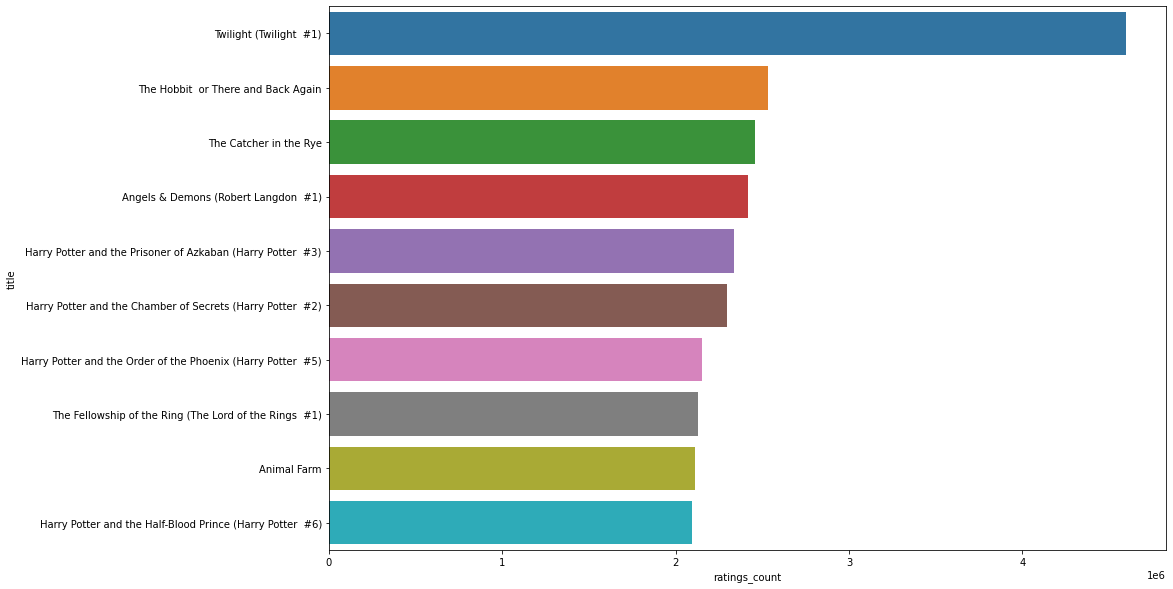

In [13]:
#plotting most rated books
most_rated = books.sort_values("ratings_count", ascending = False).head(10).set_index("title")
plt.figure(figsize=(15,10))
sns.barplot(most_rated["ratings_count"], most_rated.index, label = "Total")

<AxesSubplot:xlabel='average_rating', ylabel='title'>

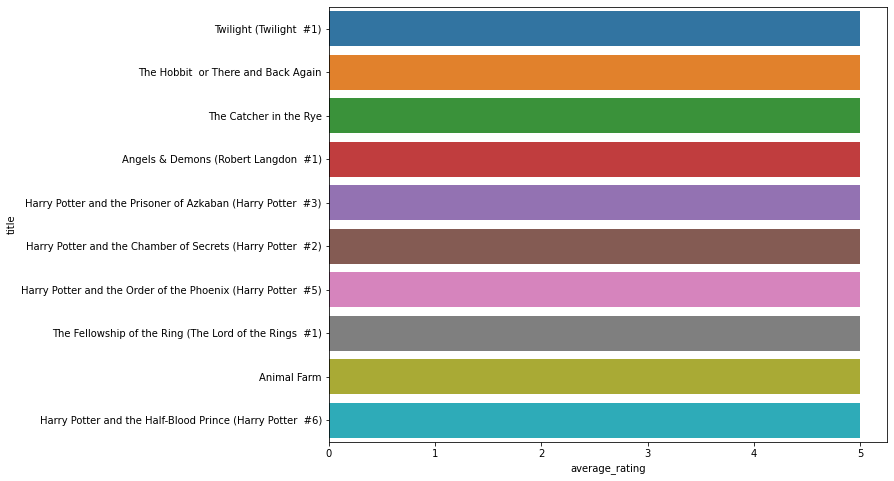

In [14]:
#top ten books based on average rating 
avg_rating = books.sort_values("average_rating", ascending = False).head(10)
plt.figure(figsize=(10,8))
sns.barplot(avg_rating["average_rating"], most_rated.index)


Text(0.5, 1.0, 'Top 10 highly rated authors')

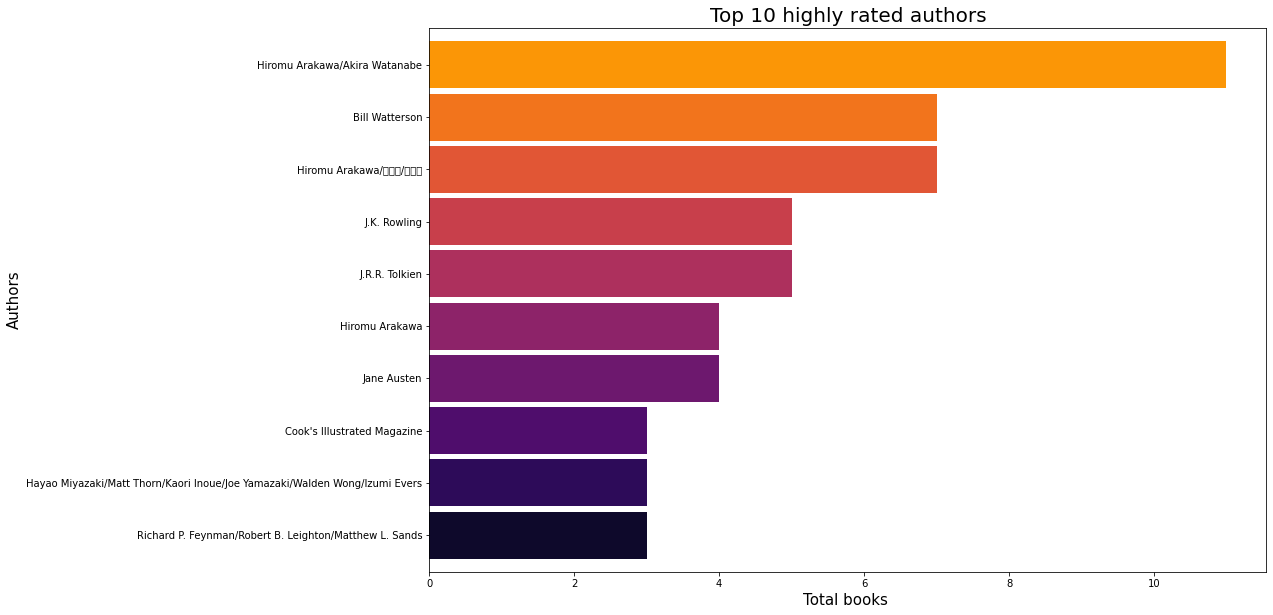

In [15]:
#top 10 publisher by number of book published
high_rated_author = books[books["average_rating"]>4.5]
high_rated_author = high_rated_author.groupby('authors')['title'].count().reset_index().sort_values('title',ascending=False).head(10).set_index('authors')
plt.subplots(figsize=(15,10))
ax = high_rated_author['title'].sort_values().plot.barh(width=0.9,color=sns.color_palette('inferno',12))
ax.set_xlabel("Total books ", fontsize=15)
ax.set_ylabel("Authors", fontsize=15)
ax.set_title("Top 10 highly rated authors",fontsize=20,color='black')

Text(0, 0.5, 'Publishers')

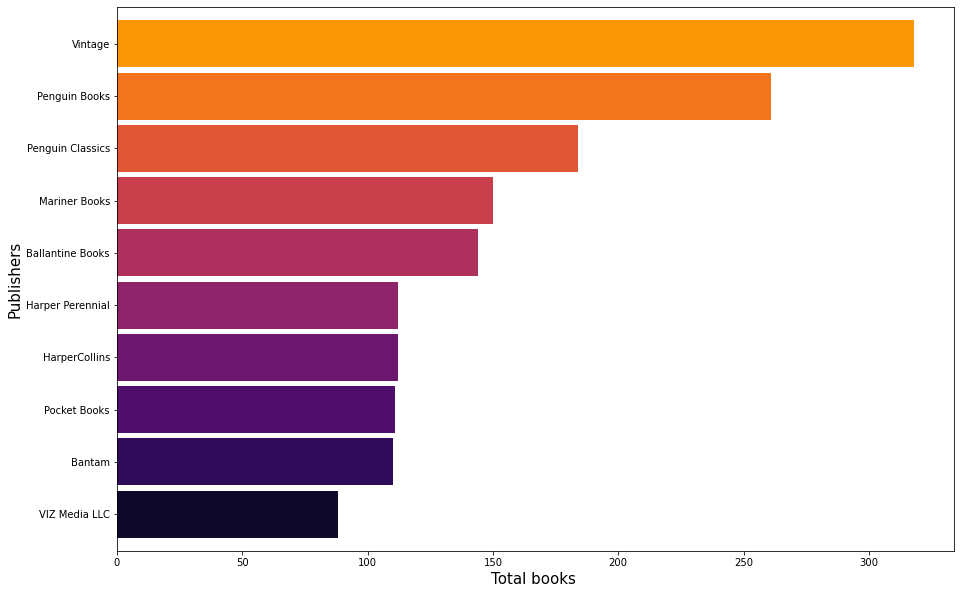

In [16]:
#top 10 highly rated publisher
top_publishers = books.groupby('publisher')['title'].count().reset_index().sort_values('title',ascending=False).head(10).set_index('publisher')
plt.subplots(figsize=(15,10))
ax = top_publishers['title'].sort_values().plot.barh(width=0.9,color=sns.color_palette('inferno',12))
ax.set_xlabel("Total books ", fontsize=15)
ax.set_ylabel("Publishers", fontsize=15)

<AxesSubplot:xlabel='average_rating', ylabel='Density'>

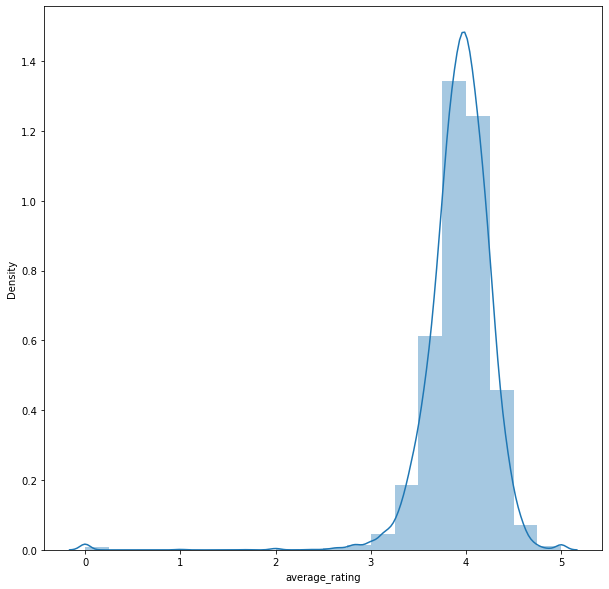

In [17]:
#average  rating distribution
plt.figure(figsize=(10,10))
rating = books.average_rating.astype(float)
sns.distplot(rating, bins =20)

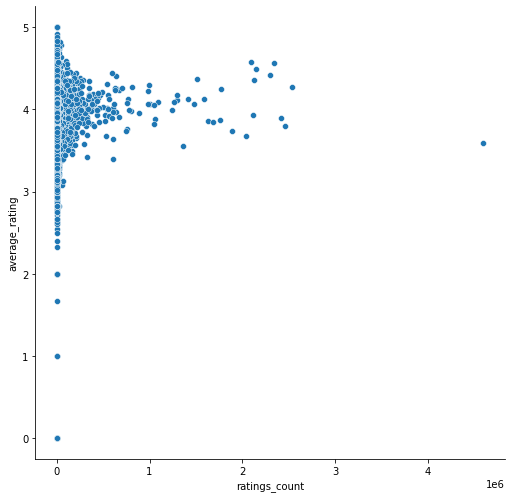

In [18]:
#Relationship between average rating and most rated 
ax = sns.relplot(data=books, x="ratings_count", y="average_rating", sizes=(100, 200), height=7, marker='o')

<Figure size 1080x720 with 0 Axes>

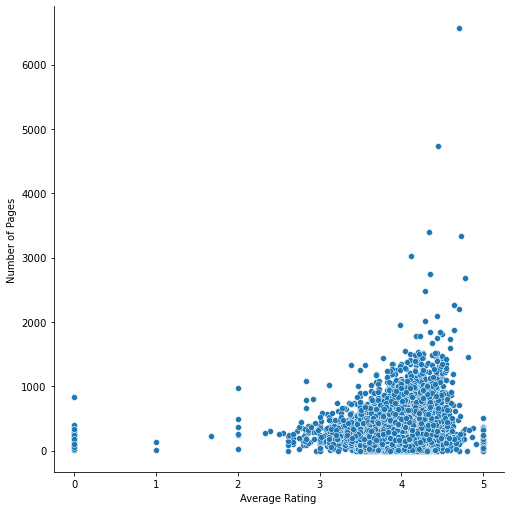

In [19]:
#Relationship between average rating and number of page
plt.figure(figsize=(15,10))
ax = sns.relplot(data=books, x="average_rating", y="  num_pages", sizes=(100, 200), height=7, marker='o')
ax.set_axis_labels("Average Rating", "Number of Pages")

### there is a double space before the column name "  num_pages". We need to remove it

In [20]:
#removing spacing in column name if there is any beside "num_pages"
books.columns = books.columns.str.replace(' ','')
books["num_pages"]

0         652
1         870
2         352
3         435
4        2690
         ... 
11118     512
11119     635
11120     415
11121     434
11122     272
Name: num_pages, Length: 11123, dtype: int64

In [21]:
#dropping bookID since its of no use
books.drop("bookID", axis=1, inplace = True)

In [22]:
books.head(2)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.


In [23]:
duplicated = books[books.duplicated()]
duplicated
#there is duplicate

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher


In [24]:
#checking books with largest page number to see if it is outlier or not
books.nlargest(5,"num_pages")

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
6497,The Complete Aubrey/Maturin Novels (5 Volumes),Patrick O'Brian,4.70,039306011X,9780393060119,eng,6576,1338,81,10/17/2004,W. W. Norton Company
6802,The Second World War,Winston S. Churchill/John Keegan,4.45,039541685X,9780395416853,eng,4736,1493,99,5/9/1986,Mariner Books
10906,Remembrance of Things Past (Boxed Set),Marcel Proust/C.K. Scott Moncrieff/Frederick A...,4.34,0701125594,9780701125592,eng,3400,6,1,3/5/1981,Chatto & Windus
6,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic
6822,Summa Theologica 5 Vols,Thomas Aquinas,4.12,0870610635,9780870610639,eng,3020,2734,84,1/1/1981,Christian Classics


#### Tilte of the books comprimises of multiple volume, therefore the maximum observation are valid

In [25]:
len(books[books["num_pages"]== 0])

76

In [26]:
books = books[books["num_pages"]!= 0]

In [27]:
len(books[books["num_pages"]== 0])

0

### Since the average rating starts from 1 and it can never be zero unless there is no rating for the book. Lets explore the data with average rating zero

In [28]:
books[(books['average_rating']==0)]

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
265,Out to Eat London 2002 (Lonely Planet Out to Eat),Lonely Planet/Mark Honan,0.0,1740592050,9781740592055,eng,295,0,0,9/1/2001,Lonely Planet
375,Juiced Official Strategy Guide,Doug Walsh,0.0,0744005612,9780744005615,eng,112,0,0,6/1/2005,BradyGames
987,Open City 6: The Only Woman He Ever Left,Open City Magazine/James Purdy/Daniel Pinchbec...,0.0,189044717X,9781890447175,eng,200,0,0,10/13/2000,Grove Press Open City Books
2532,How To Meditate: An Anthology Of Talks On Medi...,Frederick P. Lenz,0.0,1932206108,9781932206104,eng,228,0,0,1/1/2004,Frederick P. Lenz Foundation for American Budd...
2533,Insights: Talks On The Nature Of Existence,Frederick P. Lenz,0.0,1932206086,9781932206081,eng,304,0,0,1/1/2003,Frederick P. Lenz Foundation for American Budd...
2758,Venac sonetnih venaca; Puževa srma,Dobrica Erić,0.0,8644101277,9788644101277,srp,222,0,0,1/1/1996,"Izdavačka agencija ""Draganić"""
3492,Brodie's notes on Aldous Huxley's brave new world,Graham Handley,0.0,0333581296,9780333581292,eng,71,0,0,8/20/1992,Macmillan
4241,American Film Guide,Frank N. Magill,0.0,0893562505,9780893562502,eng,5,0,0,1/1/1983,Salem Press Inc
4677,The Man and the Author: John Milton: Twentieth...,J. Martin Evans,0.0,0415940478,9780415940474,eng,386,0,0,11/8/2002,Routledge
5323,Canopy: A Work for Voice and Light in Harvard ...,David Ward/Parveen Adams/Seamus Heaney/Ivan ...,0.0,0916724948,9780916724948,eng,63,0,0,12/31/1997,Arts Publications


### the data is valid since book with average rating zero does not have any ratings. 


https://www.kaggle.com/code/aayushmishra1512/what-should-you-read-next-book-recommender

In [29]:
#making copy of the data just in case i mess something 
goodread = books.copy()

## Creating new column and dividing the average rating into diffrent catagory 

In [30]:
goodread.loc[ (goodread['average_rating'] >= 0) & (goodread['average_rating'] <= 1), 'rating_between'] = "between 0 and 1"
goodread.loc[ (goodread['average_rating'] > 1) & (goodread['average_rating'] <= 2), 'rating_between'] = "between 1 and 2"
goodread.loc[ (goodread['average_rating'] > 2) & (goodread['average_rating'] <= 3), 'rating_between'] = "between 2 and 3"
goodread.loc[ (goodread['average_rating'] > 3) & (goodread['average_rating'] <= 4), 'rating_between'] = "between 3 and 4"
goodread.loc[ (goodread['average_rating'] > 4) & (goodread['average_rating'] <= 5), 'rating_between'] = "between 4 and 5"

In [31]:
goodread.head(3)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,rating_between
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,between 4 and 5
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,between 4 and 5
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,between 4 and 5


### using get_dummies on rating between and language to change them into dummy variable

In [32]:
dm_rating_between = pd.get_dummies(goodread["rating_between"])

In [33]:
dm_rating_between.head()

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [34]:
dm_language = pd.get_dummies(goodread["language_code"])

In [35]:
dm_language.head()

,ale,ara,en-CA,en-GB,en-US,eng,enm,fre,ger,gla,...,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
features = pd.concat([dm_rating_between, dm_language, goodread['average_rating'], goodread['ratings_count']], axis=1)
features.head()

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5,ale,ara,en-CA,en-GB,en-US,...,por,rus,spa,srp,swe,tur,wel,zho,average_rating,ratings_count
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.57,2095690
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.49,2153167
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.42,6333
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.56,2339585
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.78,41428


In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)

In [39]:

model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
model.fit(features)
dist, idlist = model.kneighbors(features)

In [40]:
def BookRecommender(book_name):
    book_list_name = []
    book_id = goodread[goodread['title'] == book_name].index
    book_id = book_id[0]
    for newid in idlist[book_id]:
        book_list_name.append(goodread.loc[newid].title)
    return book_list_name

In [43]:
BookNames = BookRecommender('The Second World War')
BookNames

['The Second World War',
 'The Riverside Milton',
 'Oliver Twist',
 'Animal Farm',
 'Letters to Children',
 'The Golden Notebook']

In [46]:
BookNames = BookRecommender('Harry Potter and the Half-Blood Prince (Harry Potter  #6)')
BookNames

['Harry Potter and the Half-Blood Prince (Harry Potter  #6)',
 'Harry Potter and the Order of the Phoenix (Harry Potter  #5)',
 'The Fellowship of the Ring (The Lord of the Rings  #1)',
 'Sideways: The Shooting Script',
 'Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)',
 'Eugene Onegin']

In [47]:
BookNames = BookRecommender('The Lightning Thief (Percy Jackson and the Olympians  #1)')
BookNames

['The Lightning Thief (Percy Jackson and the Olympians  #1)',
 'Two Alone',
 'As Nature Made Him: The Boy Who Was Raised as a Girl',
 'Witch Baby (Weetzie Bat  #2)',
 "Your Cheatin' Heart",
 'Be Here Now']